In [1]:
# Import packages
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
# loading the dataset
d1=pd.read_csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
d1.sample(5)

,admit,gre,gpa,rank
192,0,640,3.76,3
9,0,700,3.92,2
265,0,380,3.34,3
315,1,300,2.84,2
51,0,440,3.13,4


In [3]:
y=d1['admit']
x=d1.iloc[:, 1:]
x.sample(5)

,gre,gpa,rank
193,380,3.59,4
259,640,3.81,2
347,580,3.80,2
129,460,3.15,4
367,620,3.63,3


In [4]:
# Splitting data into 70:30 train:test ratio
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=3)

In [6]:
# Init the Gaussian Classifier
model = GaussianNB()
# Train the model 
model.fit(xtrain, ytrain)
# Predict Output 
pred = model.predict(xtest)

confusion_matrix [[72 27]
 [12  9]]


Text(89.18, 0.5, 'Predicted')

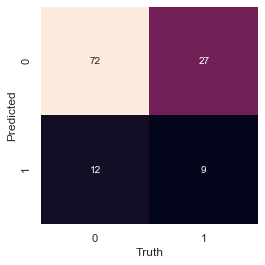

In [7]:
# Plot Confusion Matrix
mat = confusion_matrix(pred, ytest)
print('confusion_matrix',mat)
names = np.unique(pred)
#Heat map works by correlation. This shows you which variables are correlated to each other 
#from a scale of 1 being the most correlated and -1 is not correlated at all
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

In [9]:
# summarize the fit of the model
from sklearn import metrics
print(metrics.classification_report(pred, ytest))
print(metrics.confusion_matrix(pred, ytest))

              precision    recall  f1-score   support

           0       0.86      0.73      0.79        99
           1       0.25      0.43      0.32        21

    accuracy                           0.68       120
   macro avg       0.55      0.58      0.55       120
weighted avg       0.75      0.68      0.70       120

[[72 27]
 [12  9]]
